In [1]:
#@everywhere using DelimitedFiles
#@everywhere using Revise, MDToolbox
using DelimitedFiles
using Revise, MDToolbox
ENV["COLUMNS"]=110; #display width for MDToolbox

In [8]:
receptor=mdload("1cgi_receptor.pdb")
ligand=mdload("1cgi_ligand.pdb")

1x440 TrjArray{Float64, Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    64.86    34.03    29.79 |    65.13    34.96    28.68 |  …      51.32    20.79    29.47 |

In [9]:
receptor =  MDToolbox.set_charge(receptor)
ligand = MDToolbox.set_charge(ligand)

1x440 TrjArray{Float64, Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    64.86    34.03    29.79 |    65.13    34.96    28.68 |  …      51.32    20.79    29.47 |

In [31]:
receptor =  MDToolbox.set_radius(receptor)
ligand = MDToolbox.set_radius(ligand)

1x440 TrjArray{Float64, Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    21.38     0.85    -3.24 |    21.65     1.78    -4.35 |  …       7.84   -12.39    -3.56 |

In [32]:
receptor = MDToolbox.compute_sasa(receptor, 1.4)
ligand = MDToolbox.compute_sasa(ligand, 1.4)

1x440 TrjArray{Float64, Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    21.38     0.85    -3.24 |    21.65     1.78    -4.35 |  …       7.84   -12.39    -3.56 |

In [33]:
mdsave("test.pdb", receptor)
#run(`pymol test.pdb`)

In [34]:
quaternions = readdlm("../data/quaternion/QUATERNION_LIST_576_Orient");
#quaternions = readdlm("../data/quaternion/QUATERNION_LIST_4608_Orient");
#quaternions = quaternions[1:8, :]
 quaternions = quaternions[1:3, :]
size(quaternions)

(3, 4)

In [35]:
grid_space = 1.2

1.2

In [36]:
@time score = MDToolbox.docking_by_electrostatic_energy(receptor, ligand, quaternions, grid_space=1.2, iframe=1, tops=10);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


 31.871165 seconds (1.25 G allocations: 20.578 GiB, 3.90% gc time)


In [39]:
maximum(score)

0.625669025280329

In [40]:
minimum(score)

-0.7842150474950705

In [41]:
using Plots

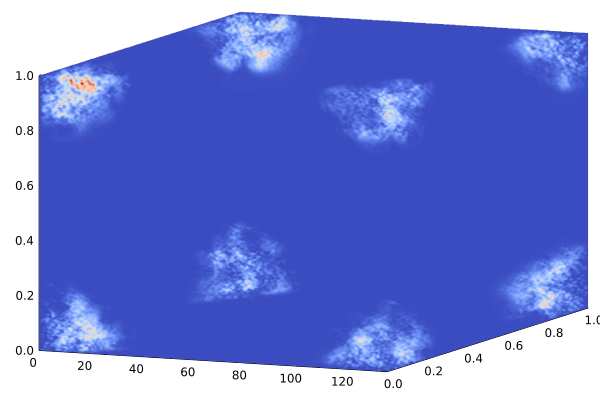

In [43]:
heatmap(score[:, :, :])

In [12]:
writepdb("result_receptor.pdb", result.receptor)
writepdb("result_ligand.pdb", result.ligand)

In [13]:
size(result.grid_RSC[60, :, :])

(229, 229)

In [14]:
using Plots

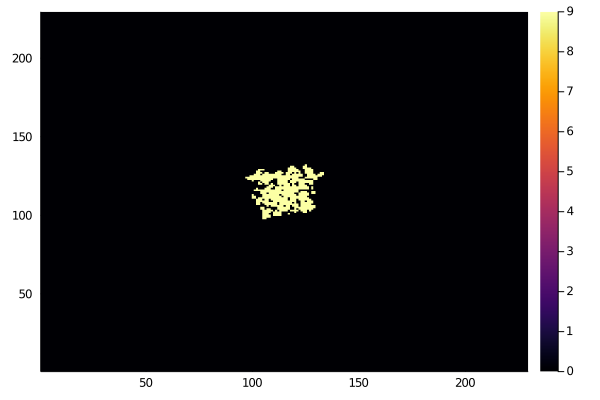

In [15]:
heatmap(imag(result.grid_RSC[110, :, :]))

In [16]:
abs.([1.0+6.0im, 7.0im])

2-element Array{Float64,1}:
 6.082762530298219
 7.0